#### File used to generate dataset plots

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %load_ext tensorboard
# import tensorboard
import os


In [2]:
from datetime import datetime
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

#### Data Paths

In [4]:
PATH_TO_DATA = '/Users/ge72vep/Desktop/thesis/Data/Model_8_extended_friction/'  ######## Check the data path ######## 


#### Loading dataset



In [5]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train.csv'))
val_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'val.csv'))
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv')) 

In [6]:
train_df['slope']  = train_df['slope'].apply(lambda x: int(1/x))
val_df['slope']  = val_df['slope'].apply(lambda x: int(1/x))
test_df['slope']  = test_df['slope'].apply(lambda x: int(1/x))

In [7]:
train_df = train_df.sort_values(['slope','friction_coeff','q', 'time']).reset_index(drop=True)
val_df = val_df.sort_values(['slope','friction_coeff','q', 'time']).reset_index(drop=True)
test_df = test_df.sort_values(['slope','friction_coeff','q', 'time']).reset_index(drop=True)

### Dataset plots

#### Trainset plots

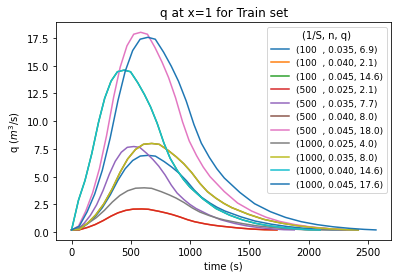

In [27]:
for identifier in train_df['identifier'].unique():
    tmp_df = train_df[train_df['identifier']==identifier].sort_values(['time','x']).reset_index(drop=True)
    q_at_1 = tmp_df[tmp_df['x']==1]['q']
    n_at_1 = tmp_df['friction_coeff'].max()
    S_at_1 = tmp_df['slope'].max()
    label = round(tmp_df[tmp_df['x']==1]['q'].max(), 1)
    slope = str(S_at_1)
    if len(slope) == 3:
        slope += '  '

    label_plot = '(' + slope + ', ' + "{:.3f}".format(n_at_1) + ', '  + str(label)  +')'
    if S_at_1 == 200:
        label_plot+='*'
    plt.plot(np.arange(len(q_at_1)), q_at_1, label = label_plot)
    plt.legend(title="(1/S, n, q)", prop={'size': 9})
    
plt.title('q at x=1 for Train set')
plt.xlabel('time (s)')
plt.ylabel(r'q ($m^{3}$/s)')
plt.savefig( '/Users/ge72vep/Desktop/thesis/dataset_plots/train_M8f.png')

#### Validation plots

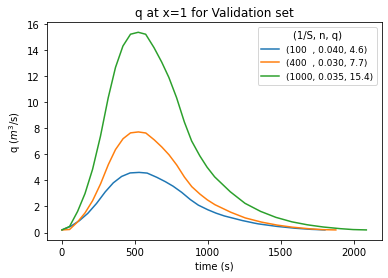

In [34]:
for identifier in val_df['identifier'].unique():
    tmp_df = val_df[val_df['identifier']==identifier].sort_values(['time','x']).reset_index(drop=True)
    q_at_1 = tmp_df[tmp_df['x']==1]['q']
    n_at_1 = tmp_df['friction_coeff'].max()
    S_at_1 = tmp_df['slope'].max()
    label = round(tmp_df[tmp_df['x']==1]['q'].max(), 1)
    slope = str(S_at_1)
    if len(slope) == 3:
        slope += '  '

    label_plot = '(' + slope + ', ' + "{:.3f}".format(n_at_1) + ', '  + str(label)  +')'
    if S_at_1 == 200:
        label_plot+='*'
    plt.plot(np.arange(len(q_at_1)), q_at_1, label = label_plot)
    plt.legend(title="(1/S, n, q)", prop={'size': 9})
    
plt.title('q at x=1 for Validation set')
plt.xlabel('time (s)')
plt.ylabel(r'q ($m^{3}$/s)')
plt.savefig( '/Users/ge72vep/Desktop/thesis/dataset_plots/val.png')

#### Testset plots

6.0
9.7
6.9
9.7
6.9
16.2


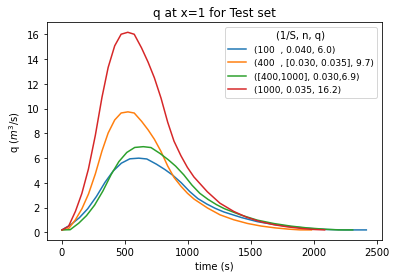

In [13]:
count_69 = 0
count_97 = 0
for identifier in test_df['identifier'].unique():
    tmp_df = test_df[test_df['identifier']==identifier].sort_values(['time','x']).reset_index(drop=True)
    q_at_1 = tmp_df[tmp_df['x']==1]['q']
    n_at_1 = tmp_df['friction_coeff'].max()
    S_at_1 = tmp_df['slope'].max()
    label = round(tmp_df[tmp_df['x']==1]['q'].max(), 1)
    slope = str(S_at_1)
    if len(slope) == 3:
        slope += '  '

    print(label)
    label_plot = '(' + slope + ', ' + "{:.3f}".format(n_at_1) + ', '  + str(label)  +')'
    if label == 9.7:
        label_plot = '(' + slope + ', ' + '[0.030, 0.035], '  + str(label)  +')'
        count_97+=1
        if count_97 ==2:
            continue
    if label == 6.9:
        label_plot = '([400,1000], ' + "{:.3f}".format(n_at_1) + ','  + str(label)  +')'
        count_69+=1
        if count_69 ==2:
            continue
    plt.plot(np.arange(len(q_at_1)), q_at_1, label = label_plot)
    plt.legend(title="(1/S, n, q)", prop={'size': 9})
    
plt.title('q at x=1 for Test set')
plt.xlabel('time (s)')
plt.ylabel(r'q ($m^{3}$/s)')
plt.savefig( '/Users/ge72vep/Desktop/thesis/dataset_plots/test_x.png') ######## Check the data path ######## 